# TALLER # 9 - ML : Grupo 5
- Maria Fernanda Garcia Torres
- Carlos Andres Borja Gonzalez
- Johan Nicolas Moyano Poveda

# ***Objetivo General:***
Desarrollar un modelo de machine learning que permita predecir o analizar el desempeño, la rentabilidad o la popularidad de los canales de YouTube en función de factores propios como el número de suscriptores, las vistas de video, el país de origen, el tipo de canal, las tasas de visualización y otros datos relevantes.
Con esta implementacion, los creadores de contenido y las empresas podran estimar los ingresos potenciales de los canales antes de colaborar o invertir en ellos.

# ***Objetivos Especificos:***

Realizar tareas de preprocesamiento de datos e ingeniería de características necesarias para que el conjunto de datos sea apto para entrenar el modelo de machine learning. Esta labor implica abordar cuestiones como valores faltantes,
codificación de variables categóricas y escalado de características numéricas, además de dividir los datos en conjuntos de entrenamiento y prueba. Con todo esto, aseguramos que los datos sean adecuados para el desarrollo del modelo.

Gestionar correctamente la selección del algoritmo optimo, el ajuste de hiperparámetros necesarios, el entrenamiento del modelo y la evaluación de su rendimiento. Con este proceso se podra generar el modelo que mejor se adapte a las caracteristicas de nuestros datos, dando como resultado una implementacion que cumpla adecuadamente con su proposito.

In [2]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import string
import re

# Gráficos
# ==============================================================================
import matplotlib.pyplot as pl
from matplotlib import style
import seaborn as sns
#style.use('ggplot') or plt.style.use('ggplot')

In [ ]:
base_datos = pd.read_csv("Global YouTube Statistics.csv", encoding="latin-1")

In [ ]:
#Inspección Visual
base_datos.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [ ]:
#Información general de Dataframe
base_datos.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [ ]:
#Información general de Dataframe
base_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [ ]:
base_datos.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

# ***Significado de Todas las Variables***
- rank: Posición del canal de YouTube en función del número de suscriptores
- Youtuber: Nombre del canal de YouTube
- subscribers: Número de suscriptores del canal
- video views: total de reproducciones en todos los videos del canal
- category: Categoría o nicho del canal
- Title: Título del canal de YouTube
- uploads: número total de vídeos subidos al canal
- Country: País donde se origina el canal de YouTube
- Abbreviation: Abreviatura del país
- channel_type: Tipo de canal de YouTube (por ejemplo, individual, marca)
- video_views_rank: Clasificación del canal en función del total de visualizaciones de vídeo
- country_rank: Clasificación del canal en función del número de suscriptores dentro de su país
- channel_type_rank: Clasificación del canal en función de su tipo (individual o marca)
- video_views_for_the_last_30_days: Total de visualizaciones de vídeo en los últimos 30 días
- lowest_monthly_earnings: Ingresos mensuales estimados más bajos del canal
- highest_monthly_earnings: Ganancias mensuales estimadas más altas del canal
- lowest_yearly_earnings: Ganancias anuales estimadas más bajas del canal
- highest_yearly_earnings: Las ganancias anuales estimadas más altas del canal
- subscribers_for_last_30_days: Número de nuevos suscriptores ganados en los últimos 30 días
- created_year: Año en que se creó el canal de YouTube
- created_month: Mes en el que se creó el canal de YouTube
- created_date: Fecha exacta de creación del canal de YouTube
- Gross tertiary education enrollment (%): Porcentaje de la población matriculada en educación terciaria en el país
- Population: Población total del país
- Unemployment rate: Tasa de desempleo en el país
- Urban_population: Porcentaje de la población que vive en zonas urbanas
- Latitude: Coordenada de latitud de la ubicación del país
- Longitude: Coordenada de longitud de la ubicación del país

# Variables que seran eliminadas dado que no aportan a nuestro analisis
- rank: Esta variable depende de "subscribers", por lo que es redundante y no aportar información adicional.

- Youtuber: El nombre del canal es único para cada canal y no aporta información predictiva.

- Title: Misma situacion que con la variable Youtuber

- created_year, created_month, created_date: Estas variables solo representan la fecha de creación del canal , por lo tanto las podemos eliminar.

- lowest_monthly_earnings, highest_monthly_earnings : Usaremos solo las variables de ganancias anuales, en vez de todas las variables que pueden hacer confuso el analisis.

- Latitude y Longitude: Dado que representa las coordenadas del pais y ya tenemos una variable con el nombre del pais, por lo que sobrarian estas variables.

In [ ]:
#Eliminamos Variables Innecesarios
eliminar = ["rank", "Youtuber", "Title", "created_year", "created_month", "created_date", "lowest_monthly_earnings", "highest_monthly_earnings", "Latitude" , "Longitude"]
data = base_datos.drop(eliminar, axis=1)


# Variables Relevantes
- subscribers: Es una variable clave para predecir el desempeño y la rentabilidad de un canal.
- video views: Se relaciona con el desempeño.
- category: Analizar la relacion que tiene la categoria del canal con el desempeño del mismo.
- channel_type: Analizar si el tipo de canal ( Marcas o de terceros ), esta relacionado con sus ganancias.
- country_rank: Analizar la popularidad que tiene un canal segun su clasificación dentro de su país
- video_views_for_the_last_30_days: Las vistas recientes también son cruciales, conocer que es lo esta de "moda"

In [ ]:
#Datos Duplicados
base_datos.duplicated().sum()

0

# Observacion
No se cuentan con ningun dato duplicado para esta base de datos


In [ ]:
#Datos Nulos Por Columna
base_datos.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [ ]:
#Datos Nulos en Total
base_datos.isnull().sum().sum()

1616

Dada la alta cantidad de datos nulos con los que se cuenta, se decide no eliminarlos dado que esto significaria una perdida de datos bastante significativa.

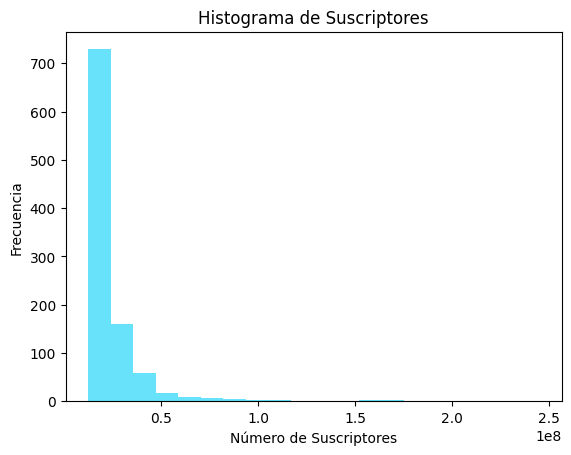

In [ ]:
# Histograma de la variable "subscribers"
plt.hist(data["subscribers"], bins=20, color='#27D6F9', alpha=0.7)
plt.xlabel("Número de Suscriptores")
plt.ylabel("Frecuencia")
plt.title("Histograma de Suscriptores")
plt.show()


Este histograma muestra la distribución del número de suscriptores en los canales de YouTube. Con esto se puede analizar las tendencias y patrones en la distribución de suscriptores.

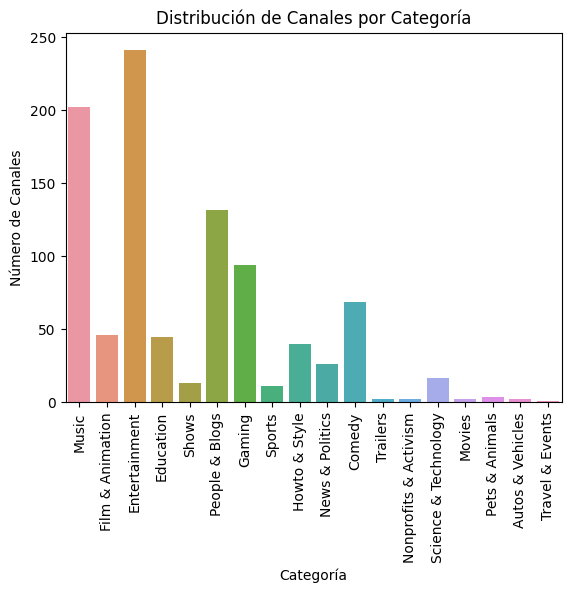

In [ ]:
# Gráfico de barras para la variable "category"
sns.countplot(data=data, x="category")
plt.xticks(rotation=90)  # Girar etiquetas en el eje x para mayor legibilidad
plt.xlabel("Categoría")
plt.ylabel("Número de Canales")
plt.title("Distribución de Canales por Categoría")
plt.show()

Evidenciar la cantidad de canales en cada categoría, en donde cada barra representa una categoría y su altura indica la cantidad de canales en esa categoría. Con esto podemos determinar qué categorías son más populares en la plataforma de YouTube.


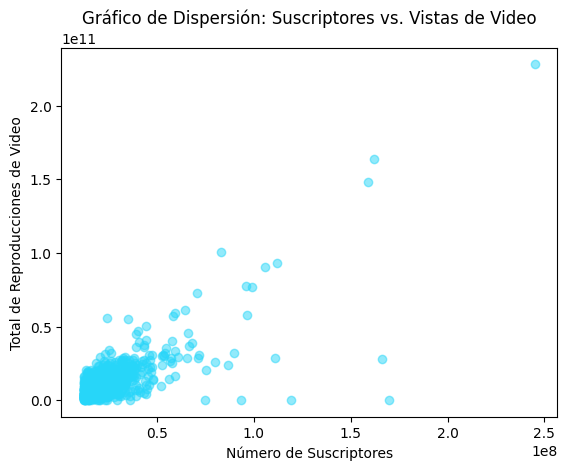

In [ ]:
# Crear un gráfico de dispersión
plt.scatter(data["subscribers"], data["video views"], alpha=0.5, color='#27D6F9')
plt.xlabel("Número de Suscriptores")
plt.ylabel("Total de Reproducciones de Video")
plt.title("Gráfico de Dispersión: Suscriptores vs. Vistas de Video")
plt.show()

Aqui podemos evidenciar como se relaciona el número de suscriptores con el total de reproducciones de video en los canales, en donde cada punto representa un canal. Por lo tanto se puede visualizar si existe una relación entre la popularidad de un canal, medida por suscriptores, y su rendimiento, usando como unidad de media las vistas de video.

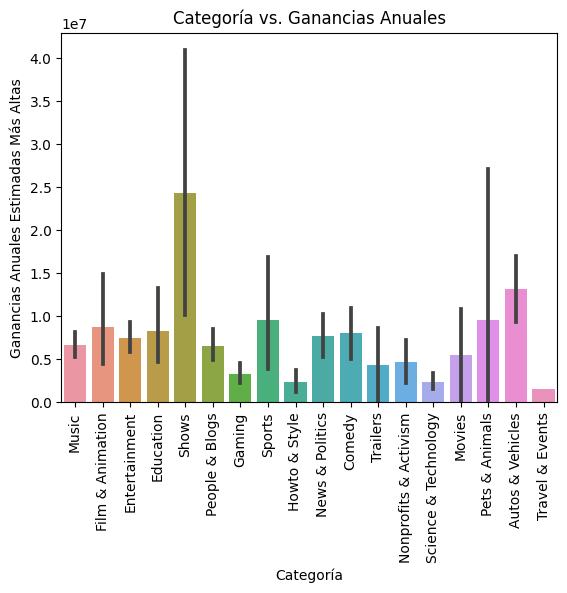

In [ ]:
sns.barplot(data=data, x="category", y="highest_yearly_earnings")
plt.xlabel("Categoría")
plt.ylabel("Ganancias Anuales Estimadas Más Altas")
plt.title("Categoría vs. Ganancias Anuales")
plt.xticks(rotation=90)
plt.show()

Se compara segun la categoría del canal con las ganancias anuales más altas, por lo tanto cada barra representa una categoría. Nos ayuda a identificar que categorías tienden a tener mayores ganancias anuales y si hay categorías más rentables que otras.

In [10]:
import pandas as pd

# Leer el archivo Excel
base_datos = pd.read_excel("/content/Datos youtube 2023.xlsx")

# Definir los límites de las clases
clases = (1.0, 2.5, float('inf'))  # Agregué un límite superior infinito para cubrir todos los valores mayores que 2.5

# Nombre de grupos
grupo = ['No rentable', 'Rentable']

# Estratificación según las clases y los nombres
base_datos['ganancias_anuales_más altas'] = pd.cut(base_datos['ganancias_anuales_más altas'], bins=clases, labels=grupo, include_lowest=True)

# Mostrar el resultado
print(base_datos[['ganancias_anuales_más altas', 'ganancias_anuales_más bajas']])


    ganancias_anuales_más altas  ganancias_anuales_más bajas
0                      Rentable                   6800000.00
1                           NaN                         0.04
2                      Rentable                   4000000.00
3                      Rentable                   5900000.00
4                      Rentable                   5500000.00
..                          ...                          ...
990                    Rentable                   1700000.00
991                    Rentable                    194200.00
992                    Rentable                       201.00
993                    Rentable                     11600.00
994                    Rentable                     72000.00

[995 rows x 2 columns]
